## **Financial Time Series**

#### **Importing Libraries**

In [67]:
import pathlib
import numpy as np
import pandas as pd
from pylab import mpl, plt
import copy
import math

notebook = pathlib.Path().resolve()
directory = notebook/"Data"

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

C:\Users\Omer Tafveez\AppData\Local\Temp\ipykernel_17104\1739030415.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#### **Basics**

In [4]:
data = pd.read_csv(directory/"eikon.csv", index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


In [5]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [7]:
instruments = ["Apple Stock", "Microsoft Stock", "Intel Stock", "Amazon Stock", "Goldman Sachs Stock", "SPDR S&P 500 ETF Trust",
               "S&P 500 Index", "VIX Volatility Index", "EUR/USD Exchange Rate", "Gold Price", "VenEck Vectors Gold Miners ETF",
               "SPDR Gold Trust"]
for ric,name in zip(data.columns, instruments):
    print("{:8s} | {}".format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VenEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


#### **Summary Statistics**

The next step for a financial analyst is to have a look at different summary statistics for the data set to get a feeling for what it is about. <br>

In [8]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [9]:
data.mean()

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

In [10]:
# finding absolute differences
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [11]:
data.diff().mean()

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

In [13]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


<Axes: >

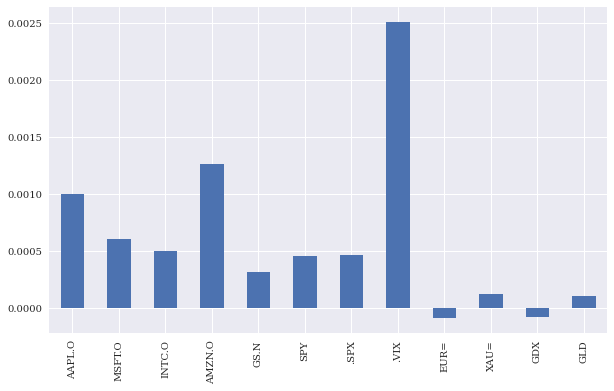

In [16]:
data.pct_change().mean().plot(kind="bar", figsize=(10,6))

<Axes: xlabel='Date'>

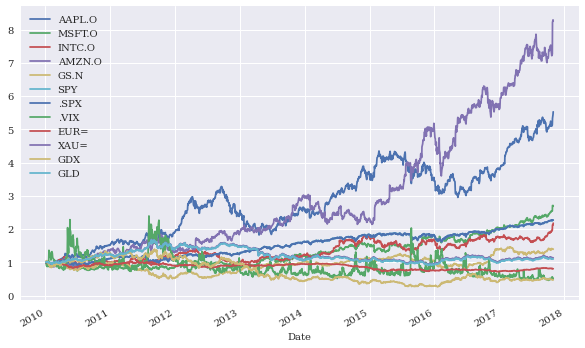

In [15]:
# As an alternative to percentage change, we can also use log returns

rets = np.log(data/data.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

#### **Resampling**

It is an important operation on financial time series data. Usually this takes as the form of downsampling, for example tick data series is resampled to one-minute interval or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample("1w", label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [18]:
data.resample("1m", label="right").last().head()


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


<Axes: xlabel='Date'>

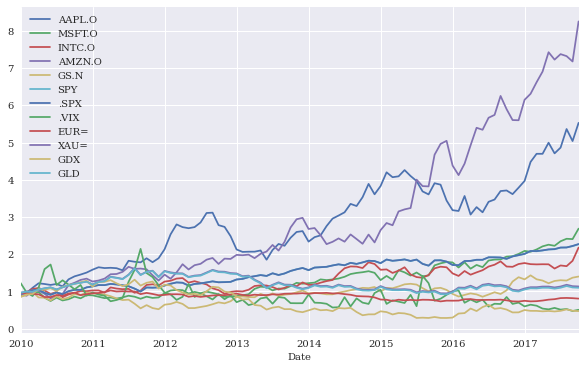

In [19]:
rets.cumsum().apply(np.exp).resample("1m", label="right").last().plot(figsize=(10,6))

#### **Rolling Statistics**

In financial traditions to work with rolling statistics, often also called financial indicators or financial studies. <br>
Window Parameter: This parameter specifies the number of consecutive data points to consider for rolling statistics

In [21]:
sym = "AAPL.O"
data = pd.DataFrame(data[sym].dropna())
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


In [22]:
# define the windows; ie the number of index values to include 
window = 20
data['min'] = data[sym].rolling(window=window).min()
data["mean"] = data[sym].rolling(window=window).mean()
data["std"] = data[sym].rolling(window=window).std()
data["median"] = data[sym].rolling(window=window).median()
data["max"] = data[sym].rolling(window=window).max()

# calculate the exponentially weighted moving averages, with decay in terms of a half life of 0.5
data["ewma"] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


<Axes: xlabel='Date'>

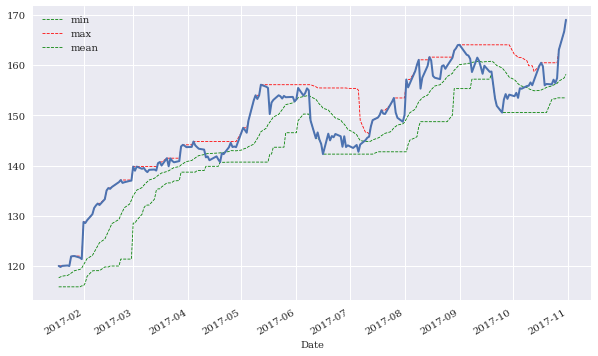

In [23]:
ax = data[["min", "max", "mean"]].iloc[-200:].plot(
    figsize=(10,6), style=["g--", 'r--', 'g--'], lw=0.8
)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)

#### **Technical Analysis**

Rolling statistics are a major tool in the *technical analysis* of stocks compared to the fundamental analysis which focuses on financial reports and the strategic positions of the company whose stock is being analyzed. <br>

A decades old trading strategy based on technical analysis is using two simple moving averages (SMAs). <br>
The idea is that the trader should go long on a stock when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. <br>

**Long on Stock**: <br>
Going long on stock means you have confidence in buying a stock because its value will increase over time. <br>
**Short on Stock**: <br>
Sell the owned stock because you fear the price might decline.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification. <br>

In the figure below, the rolling statistics only begin when there is enough data.

<Axes: xlabel='Date'>

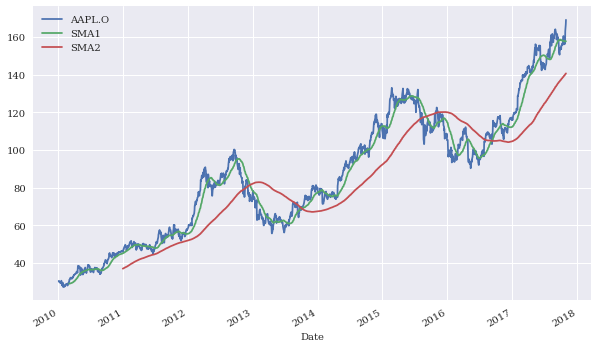

In [24]:
data["SMA1"] = data[sym].rolling(window=42).mean()
data["SMA2"] = data[sym].rolling(window=252).mean()

data[[sym, "SMA1", "SMA2"]].plot(figsize=(10,6))

In this context, the SMAs are only a means to an end. They are used to derive positions to implement a trading strategy. The changr in the position is triggered by a crossover of the two lines representing the SMA time series.

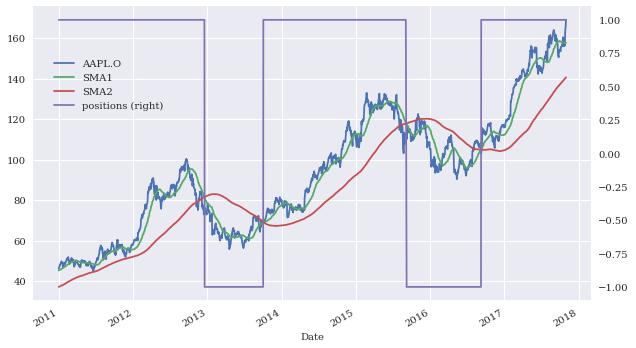

In [25]:
data.dropna(inplace=True)
data["positions"] = np.where(data["SMA1"]>data["SMA2"], 1, -1)
ax = data[[sym, "SMA1", "SMA2", "positions"]].plot(figsize=(10,6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

#### **Correlation Analysis**

In [35]:
raw = pd.read_csv(directory/"eikon.csv", index_col=0, parse_dates=True)
data = raw[[".SPX", '.VIX']].dropna()
data.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

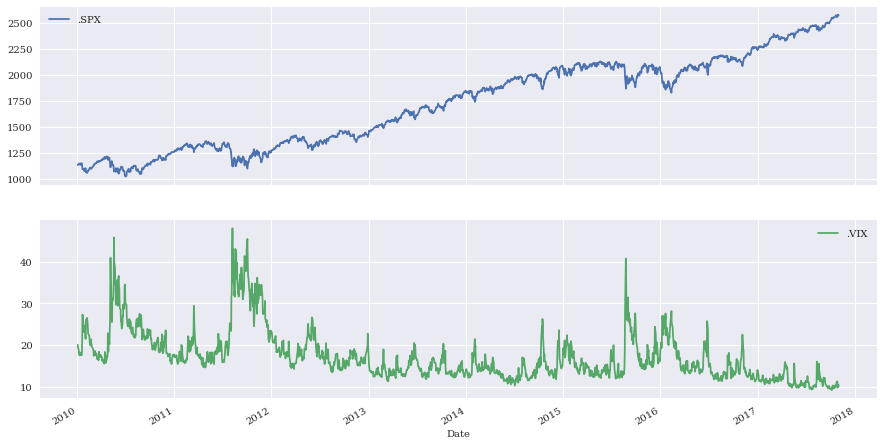

In [36]:
data.plot(subplots=True, figsize=(15,8))

<Axes: xlabel='Date'>

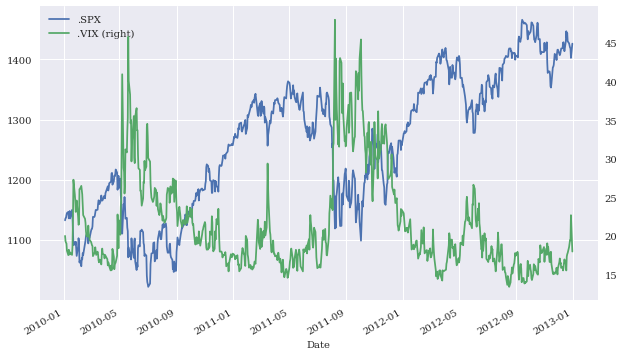

In [50]:
data.loc[:'2012-12-31'].plot(secondary_y=".VIX", figsize=(10,6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

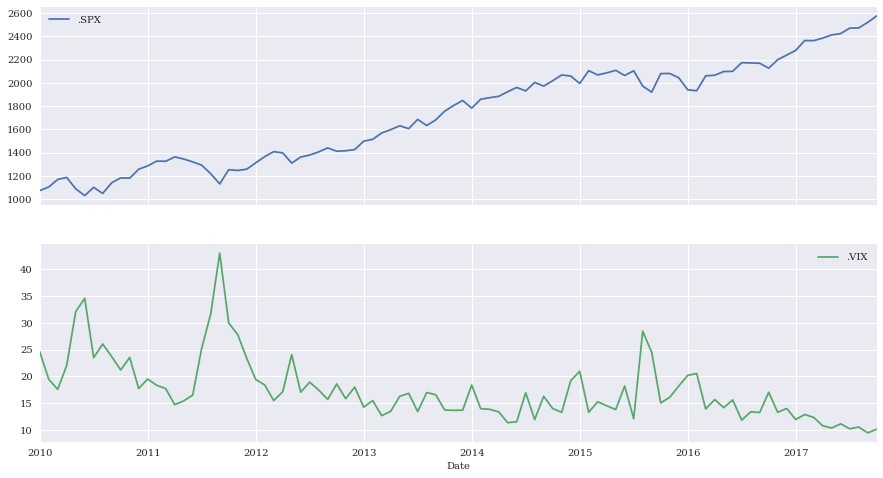

In [47]:
# with resampling on 1m, this is how it looks like.
resampled = data.copy()
resampled.resample("1m", label="right").last().plot(subplots=True, figsize=(15, 8))

#### **Logarithmic Returns**

We calculate log returns because it easier to capture volatility as variability.

In [51]:
rets = np.log(data/data.shift(1))
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

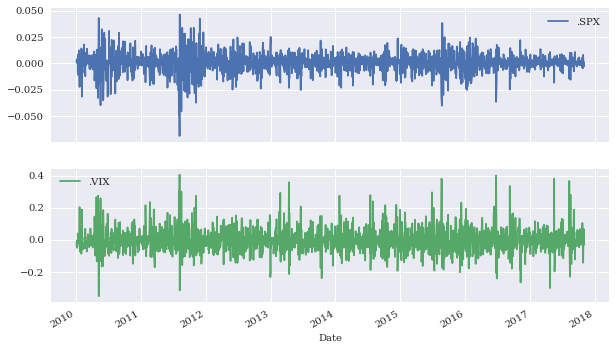

In [52]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10,6))

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

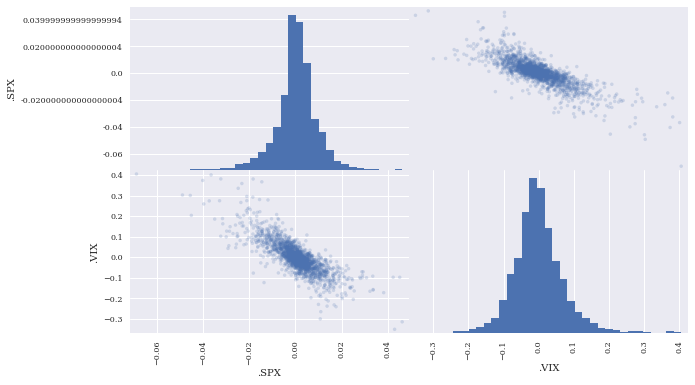

In [55]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal="hist", hist_kwds={'bins':35},figsize=(10,6))

#### **OLS Regression**

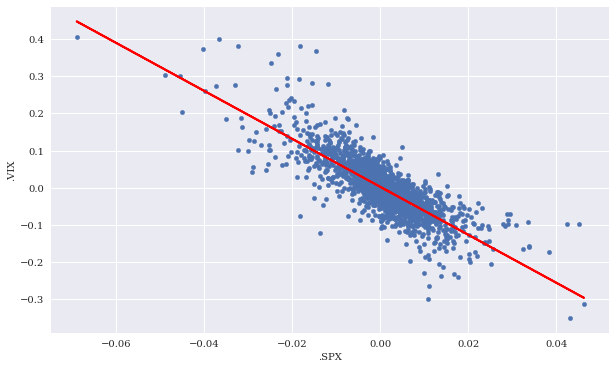

In [77]:
reg = np.polyfit(rets[".SPX"], rets[".VIX"], deg=1)
ax = rets.plot(kind="scatter", x=".SPX", y = ".VIX", figsize=(10,6))
ax.plot(rets[".SPX"], np.polyval(reg, rets[".SPX"]), 'r', lw=2)

#### **Effective way: Regression in Machine Learning Using Gradient Descent**

Although this might not be the best approach to using regression. Below is the by far the most effective way to regress.

In [104]:
x_train = np.array(rets[".SPX"])
y_train = np.array(rets[".VIX"])

#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

print(f"x_train: {x_train}")
print(f"y_train: {y_train}")
print(f"X shape: {x_train.shape}")

x_train: [ 0.00311081  0.00054538  0.00399328 ...  0.00804055 -0.00319758
  0.00094404]
y_train: [-0.03503786 -0.00986765 -0.00523287 ... -0.14242034  0.06899287
 -0.03095025]
X shape: (1971,)


In [105]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [106]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [123]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 100000
tmp_alpha = 1.5
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.80e-03  dj_dw:  5.664e-04, dj_db:  3.436e-04   w: -8.495e-04, b:-5.15453e-04
Iteration 10000: Cost 1.10e-03  dj_dw:  1.518e-04, dj_db: -6.326e-08   w: -4.723e+00, b: 1.62386e-03
Iteration 20000: Cost 9.78e-04  dj_dw:  4.072e-05, dj_db: -1.696e-08   w: -5.989e+00, b: 2.15143e-03
Iteration 30000: Cost 9.70e-04  dj_dw:  1.092e-05, dj_db: -4.549e-09   w: -6.329e+00, b: 2.29291e-03
Iteration 40000: Cost 9.69e-04  dj_dw:  2.928e-06, dj_db: -1.220e-09   w: -6.420e+00, b: 2.33084e-03
Iteration 50000: Cost 9.69e-04  dj_dw:  7.851e-07, dj_db: -3.271e-10   w: -6.444e+00, b: 2.34102e-03
Iteration 60000: Cost 9.69e-04  dj_dw:  2.105e-07, dj_db: -8.771e-11   w: -6.451e+00, b: 2.34374e-03
Iteration 70000: Cost 9.69e-04  dj_dw:  5.646e-08, dj_db: -2.352e-11   w: -6.453e+00, b: 2.34447e-03
Iteration 80000: Cost 9.69e-04  dj_dw:  1.514e-08, dj_db: -6.307e-12   w: -6.453e+00, b: 2.34467e-03
Iteration 90000: Cost 9.69e-04  dj_dw:  4.060e-09, dj_db: -1.691e-12   w: -6.453e+00, b: 2.3

In [124]:
print(f"Prediction: {w_final*(-0.04) + b_final:0.4f}")

Prediction: 0.2605


In [125]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

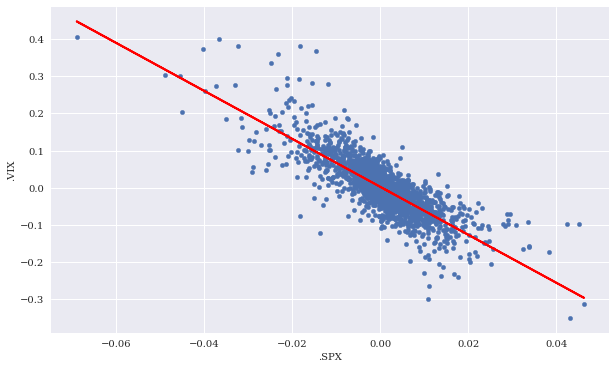

In [126]:
ax = rets.plot(kind="scatter", x=".SPX", y = ".VIX", figsize=(10,6))
ax.plot(x_train, compute_model_output(x_train, w_final, b_final), 'r', lw=2)

#### **Correlation**

Here we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [127]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


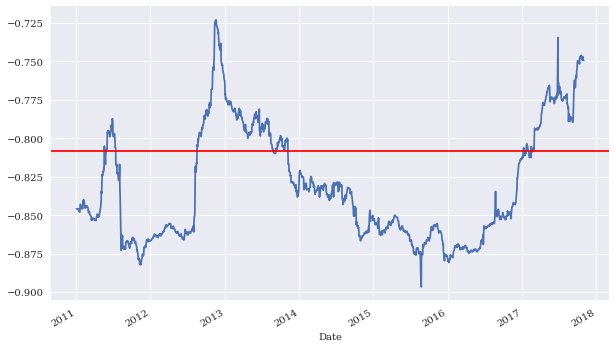

In [129]:
ax = rets[".SPX"].rolling(window=252).corr(
    rets[".VIX"]).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c="r")

#### **High-Frequency Data**

Tick data sets are a special case of financial time series. They can be handled more or a less in the same ways as, for instance the EOD Data set used throughout this chapter so far.<br>

Here we use data from **FXCM Forex Capital Markets LTD**

In [131]:
%%time

tick = pd.read_csv(directory/"fxcm_eur_usd_tick_data.csv", index_col=0, parse_dates=True)

CPU times: total: 31.2 ms
Wall time: 32.8 ms


In [132]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bid     17352 non-null  float64
 1   Ask     17352 non-null  float64
dtypes: float64(2)
memory usage: 406.7 KB


<Axes: >

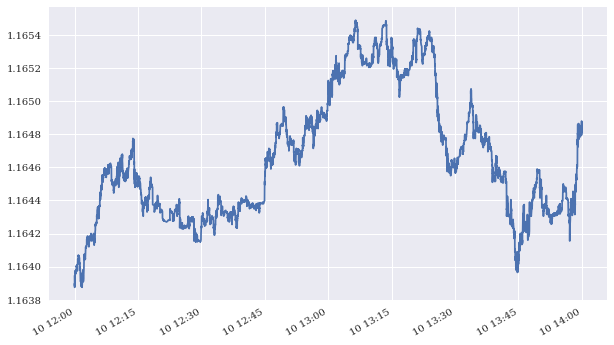

In [133]:
# calculate the mid price for every data row.
tick["Mid"] = tick.mean(axis=1)
tick["Mid"].plot(figsize=(10,6))

Working with tick data is generally a scenario where resampling of financial time series data is needed. The code that follows resamples the tick data to five minute bar data which can be then be used to backtest algorithmic trading strategies or to implement technical analysis

In [134]:
tick_resam = tick.resample(rule='5min', label="right").last()
tick_resam.head()

,Bid,Ask,Mid
2017-11-10 12:05:00,1.16425,1.16427,1.164260
2017-11-10 12:10:00,1.16454,1.16455,1.164545
2017-11-10 12:15:00,1.16449,1.16449,1.164490
2017-11-10 12:20:00,1.16437,1.16437,1.164370
2017-11-10 12:25:00,1.16429,1.16430,1.164295


<Axes: >

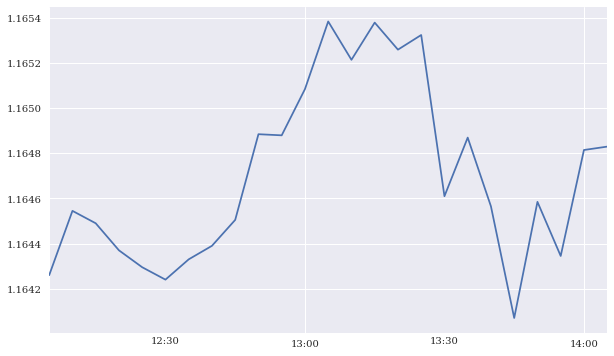

In [136]:
tick_resam["Mid"].plot(figsize=(10,6))